In [1]:
PREPROC_TRAIN_DATA = False

In [2]:
import tensorflow as tf
from gradient_accumulator.GAModelWrapper import GAModelWrapper


model = tf.keras.models.load_model('../best_model/best_model.h5', custom_objects={'GAModelWrapper': GAModelWrapper})


# model = tf.keras.models.load_model("best_model.h5", compile=False)

2022-12-30 11:01:46.118806: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:975] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-12-30 11:01:46.177481: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:975] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-12-30 11:01:46.177702: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:975] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-12-30 11:01:46.178549: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags

In [3]:
import pandas as pd
if PREPROC_TRAIN_DATA:
    df = pd.read_csv("/media/viktor/T7/gravitational-waves-kaggle-2022/kaggle-data/preprocessed-4/train-preprocessed.csv")
else:
    df = pd.read_csv("/media/viktor/T7/gravitational-waves-kaggle-2022/kaggle-data/preprocessed-4/test-preprocessed.csv")
df

,Unnamed: 0,filename,name,preprocessed_filename
0,0,/media/viktor/T7/gravitational-waves-kaggle-20...,00054c878,/media/viktor/T7/gravitational-waves-kaggle-20...
1,1,/media/viktor/T7/gravitational-waves-kaggle-20...,0007285a3,/media/viktor/T7/gravitational-waves-kaggle-20...
2,2,/media/viktor/T7/gravitational-waves-kaggle-20...,00076c5a6,/media/viktor/T7/gravitational-waves-kaggle-20...
3,3,/media/viktor/T7/gravitational-waves-kaggle-20...,001349290,/media/viktor/T7/gravitational-waves-kaggle-20...
4,4,/media/viktor/T7/gravitational-waves-kaggle-20...,001a52e92,/media/viktor/T7/gravitational-waves-kaggle-20...
...,...,...,...,...
7970,7970,/media/viktor/T7/gravitational-waves-kaggle-20...,ffbce04ef,/media/viktor/T7/gravitational-waves-kaggle-20...
7971,7971,/media/viktor/T7/gravitational-waves-kaggle-20...,ffc2d976b,/media/viktor/T7/gravitational-waves-kaggle-20...
7972,7972,/media/viktor/T7/gravitational-waves-kaggle-20...,ffc905909,/media/viktor/T7/gravitational-waves-kaggle-20...
7973,7973,/media/viktor/T7/gravitational-waves-kaggle-20...,ffe276f3e,/media/viktor/T7/gravitational-waves-kaggle-20...


In [4]:
# Replace "/media/viktor/T7/gravitational-waves-kaggle-2022/train" with "/media/viktor/T7/gravitational-waves-kaggle-2022/kaggle-data/preprocessed/train" in preprocessed_filename
df["preprocessed_filename"] = df["preprocessed_filename"].apply(lambda x: x.replace("/media/viktor/T7/gravitational-waves-kaggle-2022", "/media/viktor/T7/gravitational-waves-kaggle-2022/kaggle-data/preprocessed-4"))

In [5]:
df

,Unnamed: 0,filename,name,preprocessed_filename
0,0,/media/viktor/T7/gravitational-waves-kaggle-20...,00054c878,/media/viktor/T7/gravitational-waves-kaggle-20...
1,1,/media/viktor/T7/gravitational-waves-kaggle-20...,0007285a3,/media/viktor/T7/gravitational-waves-kaggle-20...
2,2,/media/viktor/T7/gravitational-waves-kaggle-20...,00076c5a6,/media/viktor/T7/gravitational-waves-kaggle-20...
3,3,/media/viktor/T7/gravitational-waves-kaggle-20...,001349290,/media/viktor/T7/gravitational-waves-kaggle-20...
4,4,/media/viktor/T7/gravitational-waves-kaggle-20...,001a52e92,/media/viktor/T7/gravitational-waves-kaggle-20...
...,...,...,...,...
7970,7970,/media/viktor/T7/gravitational-waves-kaggle-20...,ffbce04ef,/media/viktor/T7/gravitational-waves-kaggle-20...
7971,7971,/media/viktor/T7/gravitational-waves-kaggle-20...,ffc2d976b,/media/viktor/T7/gravitational-waves-kaggle-20...
7972,7972,/media/viktor/T7/gravitational-waves-kaggle-20...,ffc905909,/media/viktor/T7/gravitational-waves-kaggle-20...
7973,7973,/media/viktor/T7/gravitational-waves-kaggle-20...,ffe276f3e,/media/viktor/T7/gravitational-waves-kaggle-20...


In [6]:
# Loop over the dataset and make predictions: save the predictions to a list and create a column in the dataframe
# with the predictions
import numpy as np
from tqdm import tqdm
predictions = []
for i in tqdm(range(len(df))):
    
    # Get the path to the file
    path = df.iloc[i]["preprocessed_filename"]
    # Load the data
    data = np.load(path)
    # expand the dimensions
    data = np.expand_dims(data, axis=0)
    
    # data = data - np.min(data)
    data = 2 * data / np.max(data)  - 1
    
    # Make a prediction
    prediction = model.predict(data, verbose=0)
    # Save the prediction
    predictions.append(prediction[0][0])
    
    if i % 1000 == 0:
        # clear backed memory
        tf.keras.backend.clear_session()
    
df["prediction"] = predictions
df

  0%|          | 0/7975 [00:00<?, ?it/s]2022-12-30 11:01:55.520716: I tensorflow/stream_executor/cuda/cuda_dnn.cc:384] Loaded cuDNN version 8204
2022-12-30 11:01:57.693226: W tensorflow/core/common_runtime/bfc_allocator.cc:290] Allocator (GPU_0_bfc) ran out of memory trying to allocate 2.27GiB with freed_by_count=0. The caller indicates that this is not a failure, but this may mean that there could be performance gains if more memory were available.
2022-12-30 11:01:57.693256: W tensorflow/core/common_runtime/bfc_allocator.cc:290] Allocator (GPU_0_bfc) ran out of memory trying to allocate 2.27GiB with freed_by_count=0. The caller indicates that this is not a failure, but this may mean that there could be performance gains if more memory were available.
2022-12-30 11:01:57.712560: W tensorflow/core/common_runtime/bfc_allocator.cc:290] Allocator (GPU_0_bfc) ran out of memory trying to allocate 2.27GiB with freed_by_count=0. The caller indicates that this is not a failure, but this may me

,Unnamed: 0,filename,name,preprocessed_filename,prediction
0,0,/media/viktor/T7/gravitational-waves-kaggle-20...,00054c878,/media/viktor/T7/gravitational-waves-kaggle-20...,0.351325
1,1,/media/viktor/T7/gravitational-waves-kaggle-20...,0007285a3,/media/viktor/T7/gravitational-waves-kaggle-20...,0.389704
2,2,/media/viktor/T7/gravitational-waves-kaggle-20...,00076c5a6,/media/viktor/T7/gravitational-waves-kaggle-20...,0.378190
3,3,/media/viktor/T7/gravitational-waves-kaggle-20...,001349290,/media/viktor/T7/gravitational-waves-kaggle-20...,0.399211
4,4,/media/viktor/T7/gravitational-waves-kaggle-20...,001a52e92,/media/viktor/T7/gravitational-waves-kaggle-20...,0.484827
...,...,...,...,...,...
7970,7970,/media/viktor/T7/gravitational-waves-kaggle-20...,ffbce04ef,/media/viktor/T7/gravitational-waves-kaggle-20...,0.418774
7971,7971,/media/viktor/T7/gravitational-waves-kaggle-20...,ffc2d976b,/media/viktor/T7/gravitational-waves-kaggle-20...,0.430827
7972,7972,/media/viktor/T7/gravitational-waves-kaggle-20...,ffc905909,/media/viktor/T7/gravitational-waves-kaggle-20...,0.450491
7973,7973,/media/viktor/T7/gravitational-waves-kaggle-20...,ffe276f3e,/media/viktor/T7/gravitational-waves-kaggle-20...,0.381334


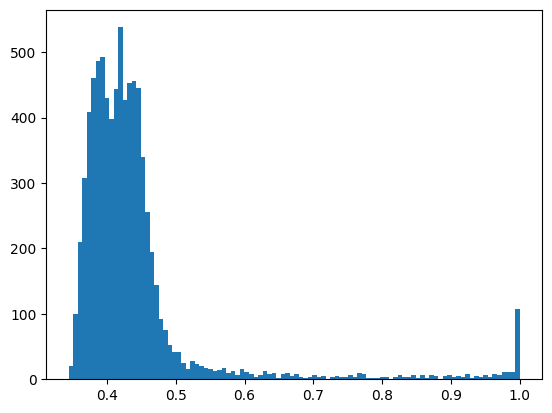

In [7]:
import matplotlib.pyplot as plt
plt.hist(df["prediction"], bins=100);

In [8]:
# calculate auc
from sklearn.metrics import roc_auc_score
if PREPROC_TRAIN_DATA:
    print(roc_auc_score(df["target"], df["prediction"]))

In [9]:
df_sub = df[["name", "prediction"]]
# rename prediction to target
df_sub = df_sub.rename(columns={"prediction": "target",
                                "name": "id"})


# if PREPROC_TRAIN_DATA == False:
#     df_blend = pd.read_csv("blending_submission.csv")
    
#     # sort by id
#     df_blend = df_blend.sort_values(by="id")
#     # sort df by id
#     df_sub = df_sub.sort_values(by="id")
    
#     df['target'] = 0.5 * df_sub['target'] + 0.5 * df_blend['target']
    
    


df_sub.to_csv("submission.csv", index=False)
df_sub

,id,target
0,00054c878,0.351325
1,0007285a3,0.389704
2,00076c5a6,0.378190
3,001349290,0.399211
4,001a52e92,0.484827
...,...,...
7970,ffbce04ef,0.418774
7971,ffc2d976b,0.430827
7972,ffc905909,0.450491
7973,ffe276f3e,0.381334


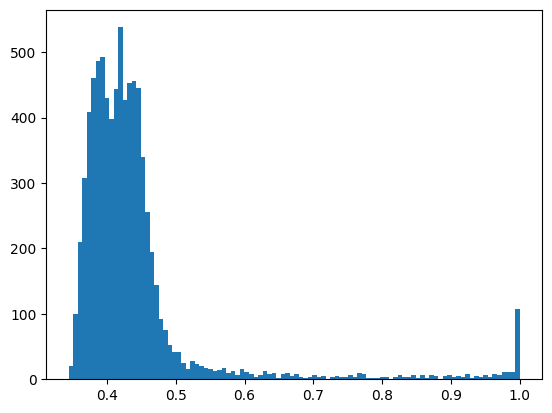

In [10]:
plt.hist(df_sub["target"], bins=100);

In [11]:
if PREPROC_TRAIN_DATA:
    df.to_csv("train_predictions.csv", index=False)
else:
    df.to_csv("test_predictions.csv", index=False)